# Tutorial12: 使用LLaMA-Factory完成Qwen2.5大模型的微调、推理

建议在SCOW AI集群运行本教程。

本节以Qwen2.5-1.5B-Instruct模型为例，使用LLaMA-Factory镜像对这个Qwen模型完成微调、推理的步骤.

分以下几步来实现：
1. 创建vscode应用，拉取并使用平台提供的LLaMA-Factory镜像，选取Qwen2.5-1.5B-Instruct模型
2. 按照步骤，使用LLaMA-Factory镜像完成对大模型的微调和推理

建议使用1张910B NPU运行本教程。

## 1、拉取镜像并安装

1.1 创建作业

1.1.1 登录SCOW平台，选取智算平台，进入AI集群

![alt text](../figures/1.1.1-scow-NV-cluster.png)

```

1.1.2 然后点击作业->AI实验集群->应用->创建应用

![alt text](../figures/1.1.2-NV.png)


1.1.3 点击VSCode图标，创建VSCode应用

![alt text](../figures/1.1.3-vscode.png)


1.1.4 拉取镜像，选取大模型
在创建vscode页面中，进行配置：


将 app-store-images.pku.edu.cn/hiyouga/llamafactory:0.9.4 拷贝后，粘贴到远程镜像地址框中，用于平台根据镜像地址拉取相应的LLaMa-Factory镜像


将 ${SCOW_AI_ALGORITHM_PATH}/bin/code-server 拷贝后，粘贴到运行命令框中，用于平台启动vscode应用

![alt text](../figures/1.1.4-vscode-image.png)


1.1.5 添加模型和算法


勾选添加类型 - 模型，下拉菜单中，选取 公共模型；模型下拉菜单中，选取 Qwen/Qwen2.5-1.5B-Instruct(l202400091) 模型，版本下拉菜单中，选取 latest


勾选添加类型 - 算法，下拉菜单中，选取 公共算法；算法下拉菜单中，选取 code-server(2206197009) 算法，版本下拉菜单中，选取 4.99.4-linux-amd64，此时应可以看到算法描述部分显示启动命令，与1.1.4步骤中的启动命令是一致的

![alt text](../figures/1.1.5-NV-model.png)

1.1.6 资源部分不需要修改，也可以根据前一步骤中的模型描述，将单节点加速卡卡数修改为1/2/4，然后点击 提交 按钮

![alt text](../figures/1.1.6-NV-resource.png)


1.1.7 进入新创建的VScode应用的浏览器界面

提交后，刚创建的作业在 未结束的作业 列表中，作业状态为 PENDING

![alt text](../figures/1.1.7-NV-vscode-pending.png)

点击 刷新 按钮，手动进行刷新后，作业状态转为 RUNNING
在这条作业的操作中，点击 连接 图标，浏览器将打开新的页面来展示新创建的VScode应用

![alt text](../figures/1.1.7-NV-vscode-running-connect.png)

如果你是首次走到这一步，会看见如下弹窗，勾选 信任作者，并点击 信任作者 按钮

![alt text](../figures/1.1.7-trust-author-popup.png)

进入新创建的VScode应用的浏览器界面

![alt text](../figures/1.1.7-NV-vscode-webpage.png)


1.1.8 打开app文件夹，之后的所有文件都将保存在这个文件夹下，之后的所有操作都将在这个文件夹下进行

选中浏览器的地址栏，长按 右键 来查看现在的文件夹为 root 文件夹

![alt text](../figures/1.1.8-NV-vscode-root-url.png)

将里面 root 替换为 app，然后点击回车键，

![alt text](../figures/1.1.8-NV-vscode-app-url.png)

页面左侧显示app文件夹，里面包含子文件夹和文件

![alt text](../figures/1.1.8-app-folder.png)

点选左侧导航栏中第一个选项，选择Termianl -> New Terminal 创建新终端

![alt text](../figures/1.1.8-terminal-icon.png)

![alt text](../figures/1.1.8-create-terminal.png)

完整的VSCode应用包含的左侧app文件夹、右侧上半区域的文件显示窗口、和右侧下半区域的终端

![alt text](../figures/1.1.8-NV-vscode-check-app-folder.png)

# 2、进行配置

2.1 在app文件夹中创建config.yaml文件

2.1.1 拷贝下面代码：

In [ ]:
echo "model_name_or_path: $SCOW_AI_MODEL_PATH

stage: sft  # Supervised Fine-Tuning 有监督的微调
do_train: true
finetuning_type: lora # 微调类型,例如lora
lora_target: all  # LoRA微调的目标模块
dataset: identity #新模型的数据集名称，位置在app/data/identity.json
template: qwen # 数据模板，例如qwen,llama3
cutoff_len: 1024 # 序列截断长度。
max_samples: 1000 # 最大样本数 
output_dir: ${WORK_DIR}/llama-factory-output
# output_dir: /root/LLaMA-Factory/models/Qwen2.5-1.5B-Instruct-output

# 配置文件中的TensorBoard设置
logging_dir: ./logs/tensorboard
# report_to: tensorboard" > config.yaml

2.1.2 粘贴到终端terminal，再按回车键执行这些代码，完成创建config.yaml 文件

![alt text](../figures/2.1.2-NV-cli-create-config-yaml-updated.png)

2.1.3 查看在app文件夹中已经创建了 config.yaml 文件，点击这个文件，右侧上部的窗口中显示文件包含的内容

![alt text](../figures/2.1.3-NV-check-config-yaml-updated.png)

2.2 在app文件夹中创建 step1_model_reasoning.py 文件，这是作为模型推理步骤的文件

2.2.1 点击红色箭头所指的图标，新建文件，在蓝色方框内给新建的文件取名 step1_model_reasoning.py 再按回车键

![alt text](../figures/2.2.1-create-step1-py.png)

2.2.2 右侧上半部的窗口打开了这个新建的 step1_model_reasoning.py 空白文件

![alt text](../figures/2.2.2-blank-step1-py.png)


2.2.3 拷贝下面代码:

In [ ]:
import torch
# import torch_npu
from transformers import AutoModelForCausalLM, AutoTokenizer
import os

model_dir = os.environ.get('SCOW_AI_MODEL_PATH', './models/Qwen2-1.5B-Instruct')
print(f"Model downloaded to: {model_dir}")

# 设置cuda设备
device = 'cuda:0'
torch.cuda.set_device(device)

# 加载模型和分词器
tokenizer = AutoTokenizer.from_pretrained(model_dir)
model = AutoModelForCausalLM.from_pretrained(model_dir).to(device)

model.eval()  # 设置为评估模式

# 准备输入数据
input_text = "根据提示生成一段商品描述：类型#上衣*材质#牛仔布*颜色#白色*风格#简约*图案#刺绣*衣样式#外套*衣款式#破洞"
input_ids = tokenizer.encode(input_text, return_tensors='pt').to(device)
print("input_ids:", input_ids)

# 运行推理
with torch.no_grad():
    output = model.generate(input_ids, max_length=500)

# 解码输出
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print("\ngenerated_text:", generated_text)

2.2.4 粘贴到已经打开的空白的 step1_model_reasoning.py 文件，这样就完成了文件创建

![alt text](../figures/2.2.4-NV-check-step1-py.png)



2.3 在app文件夹中创建 step2_refined_model_reasoning.py 文件，这是作为微调后的模型推理步骤的文件

2.3.1 击红色箭头所指的图标，新建文件，在蓝色方框内给新建的文件取名 step2_refined_model_reasoning.py 再按回车键

![alt text](../figures/2.3.1-create-step2-py.png)

2.3.2 右侧上半部的窗口打开了这个新建的 step2_refined_model_reasoning.py 空白文件

![alt text](../figures/2.3.2-blank-step2-py.png)

2.3.3 拷贝下面代码:

In [ ]:
import torch
# import torch_npu
from transformers import AutoModelForCausalLM, AutoTokenizer
import os

# 设置cuda设备
device = 'cuda:0'
torch.cuda.set_device(device)

# for model_dir in [os.environ.get('SCOW_AI_MODEL_PATH', './models/Qwen2-1.5B-Instruct'), '/root/LLaMA-Factory/models/Qwen2.5-1.5B-Instruct-output']:
for model_dir in [os.environ.get('SCOW_AI_MODEL_PATH'), os.path.join(os.environ.get('WORK_DIR'), 'llama-factory-output')]:
    print(f"=== Model: {model_dir} =========")

    # 加载模型和分词器
    tokenizer = AutoTokenizer.from_pretrained(model_dir)
    model = AutoModelForCausalLM.from_pretrained(model_dir).to(device)

    model.eval()  # 设置为评估模式

    # 准备输入数据
    input_text = "根据提示生成一段商品描述：类型#上衣*材质#牛仔布*颜色#白色*风格#简约*图案#刺绣*衣样式#外套*衣款式#破洞"
    input_ids = tokenizer.encode(input_text, return_tensors='pt').to(device)
    print("input_ids:", input_ids)

    # 运行推理
    with torch.no_grad():
        output = model.generate(input_ids, max_length=500)

    # 解码输出
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    print("\ngenerated_text:", generated_text)

2.3.4 粘贴到已经打开的空白的 step2_refined_model_reasoning.py 文件，这样就完成了文件创建

![alt text](../figures/2.3.4-NV-check-step2-py.png)



# 3、用镜像对模型进行训练、微调

3.1 用模型进行推理

3.1.1 在右侧下半部的终端terminal中，红色线的后面粘贴命令 python step1_model_reasoning.py 再按回车键

![alt text](../figures/3.1.1-NV-cli-run-step1-py.png)

3.1.2 在右侧下半部的终端terminal中，查看推理结果

可以看到下载并使用的是 Qwen2.5-1.5B-Instruct 模型
任务是根据提示生成一段商品描述

![alt text](../figures/3.1.2-NV-cli-check-step1-py.png)


3.2 对模型进行训练

3.2.1 在右侧下半部的终端terminal中，红色线的后面粘贴命令 llamafactory-cli train ./config.yaml 再按回车键

![alt text](../figures/3.2.1-NV-cli-train-config-yaml.png)

3.2.2 在右侧下半部的终端terminal中，查看训练结果

可以看到数据集 identity 这是在 config.yaml 文件中进行的配置

![alt text](../figures/3.2.2-check-train-config-yaml-1.png)

模型训练所用的时间等信息

![alt text](../figures/3.2.2-check-train-config-yaml-2.png)


3.3 对模型进行微调

3.3.1 在右侧下半部的终端terminal中，红色线的后面粘贴命令 python step2_refined_model_reasoning.py 再按回车键

![alt text](../figures/3.3.1-NV-cli-run-step2-py.png)

3.3.2 在右侧下半部的终端terminal中，查看微调后的结果
可以看到下载并使用的是 Qwen2.5-1.5B-Instruct 模型
任务是根据提示生成一段商品描述

![alt text](../figures/3.3.2-NV-cli-check-step2-py-1.png)

模型微调后的结果可以跟步骤 3.1.2 中模型未经过微调的结果对照来看

![alt text](../figures/3.3.2-NV-cli-check-step2-py-2.png)

# 4、多机多卡训练

4.1 申请资源

申请两个相同的vscode应用，镜像同样使用llamafactory:0.9.4，选择code-server算法、Qwen2.5-1.5B-Instruct模型、identity-pku-assistant数据集，各两张加速卡
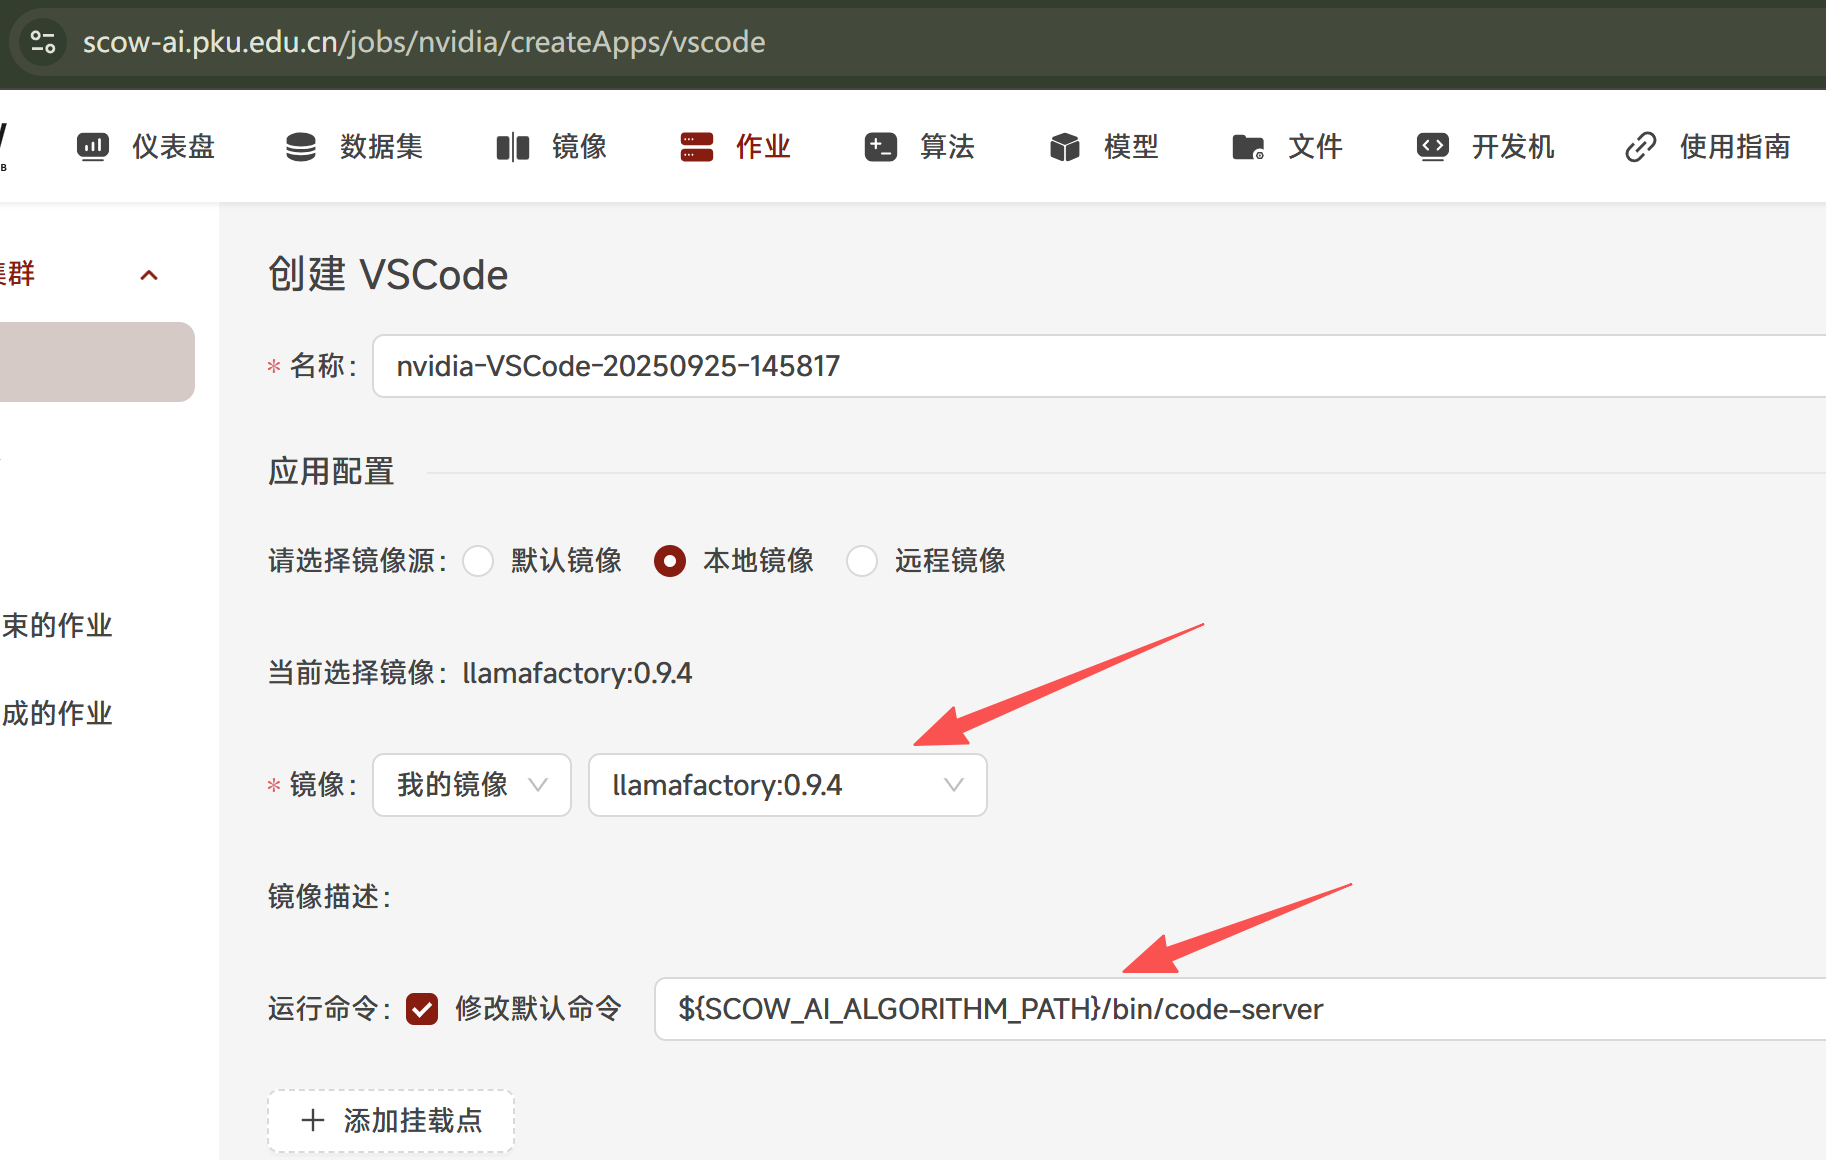
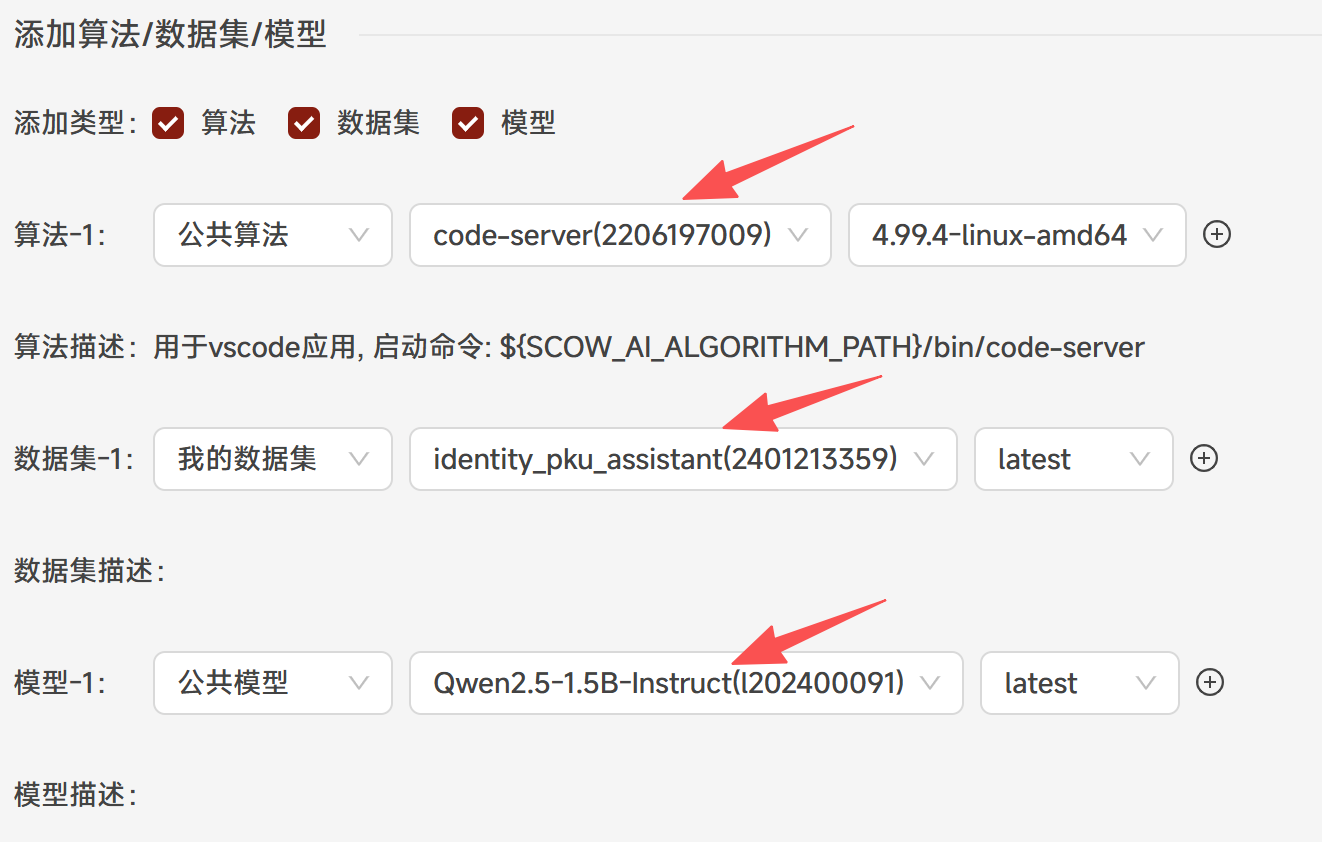

点击详情进入确保两个作业跑在不同节点
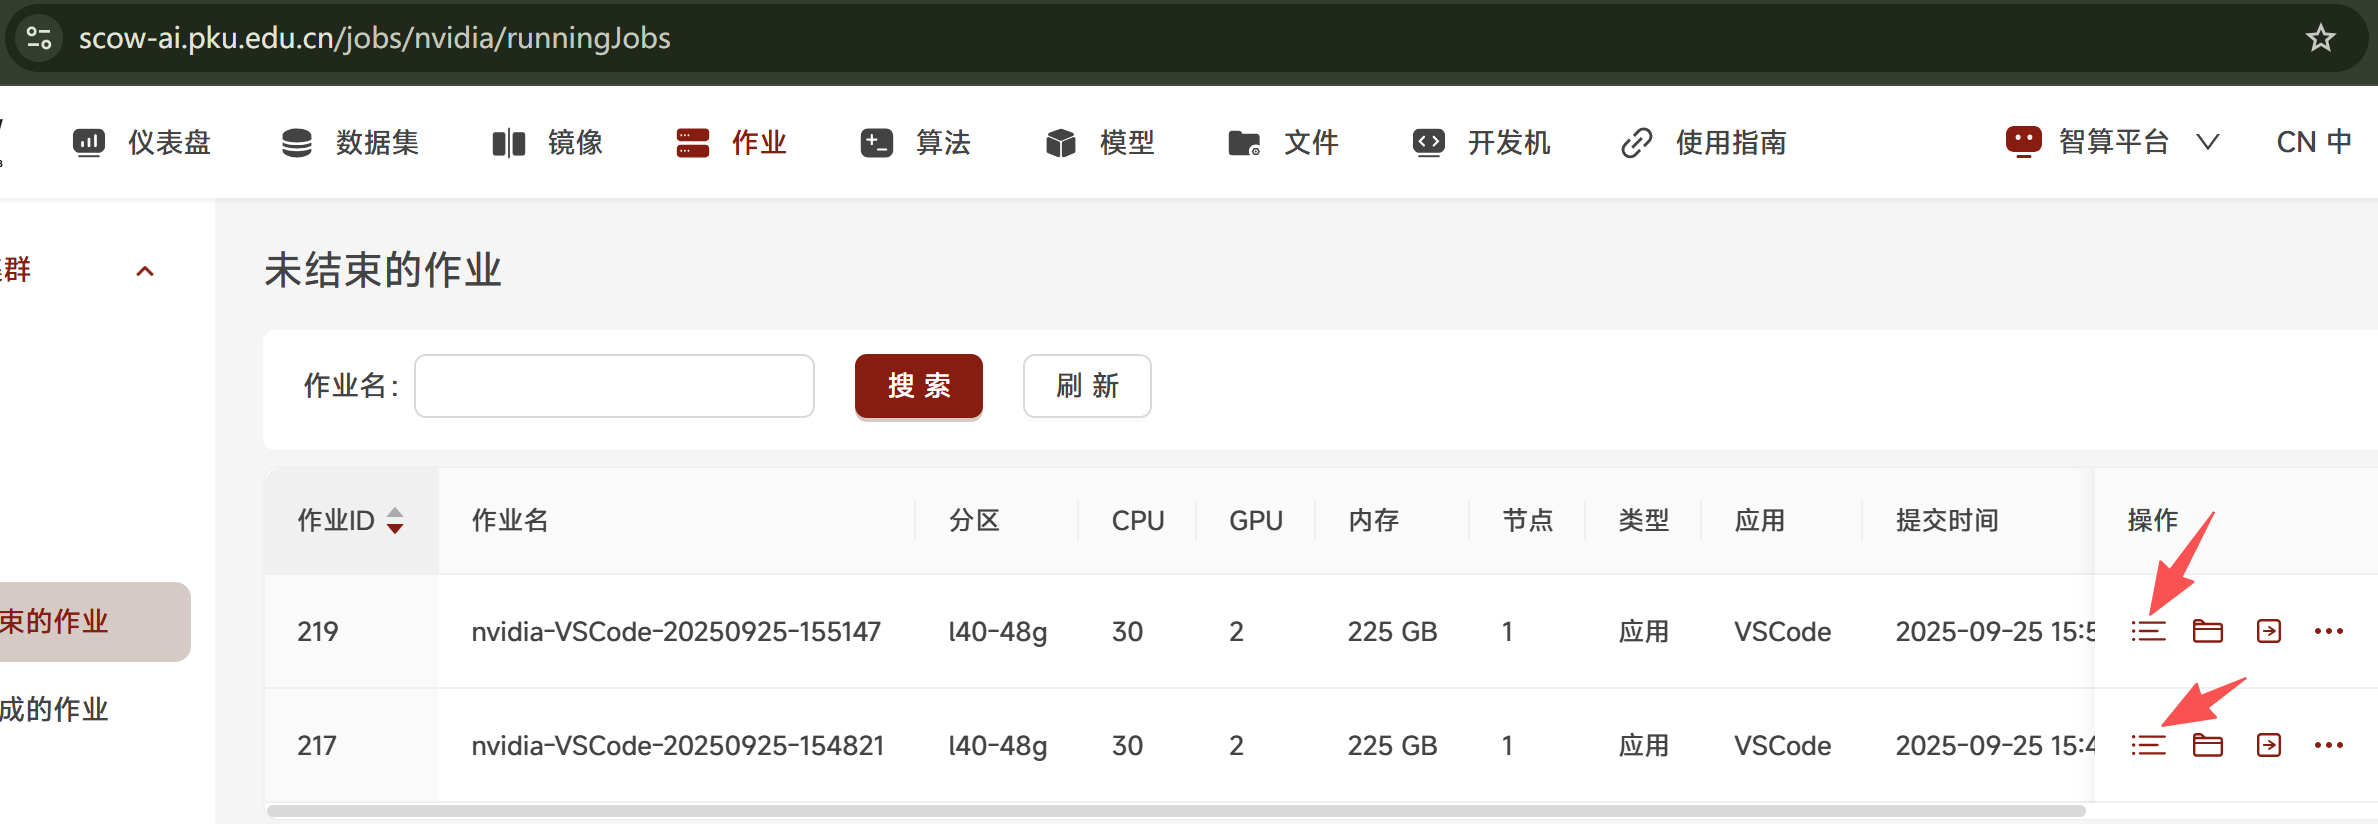
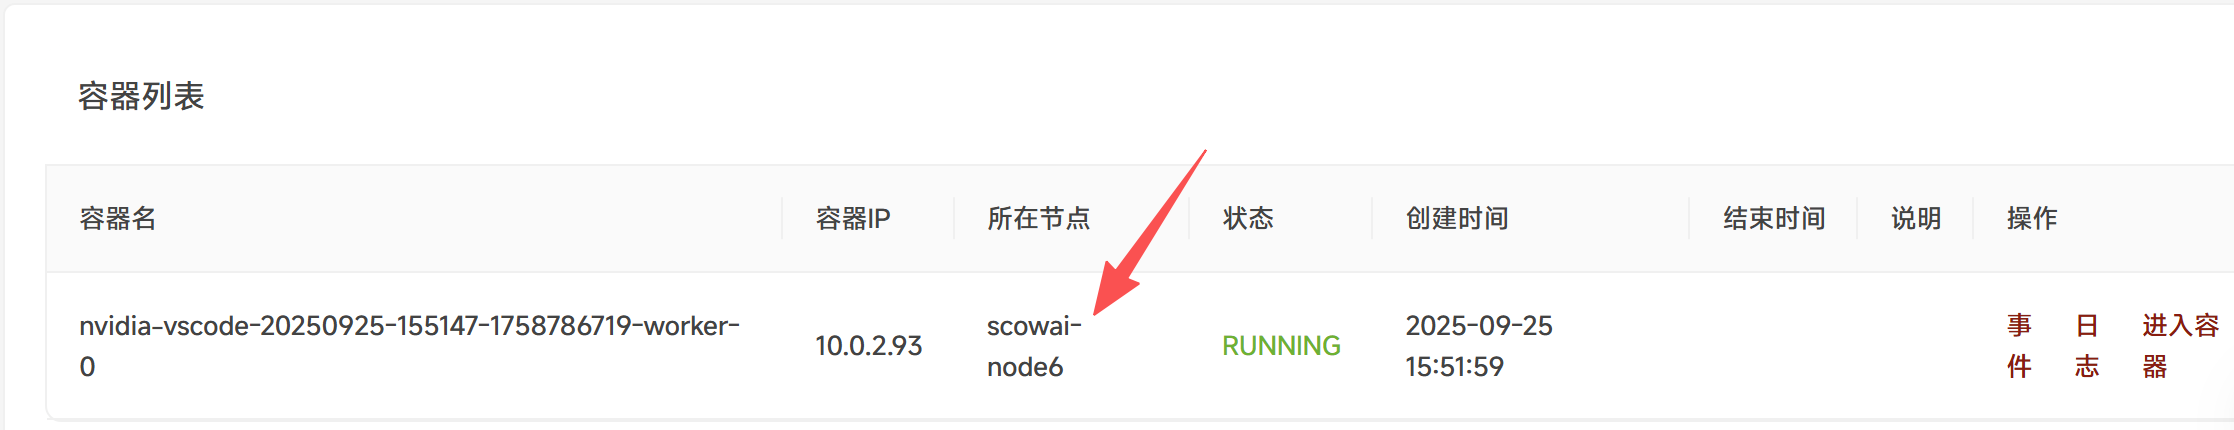
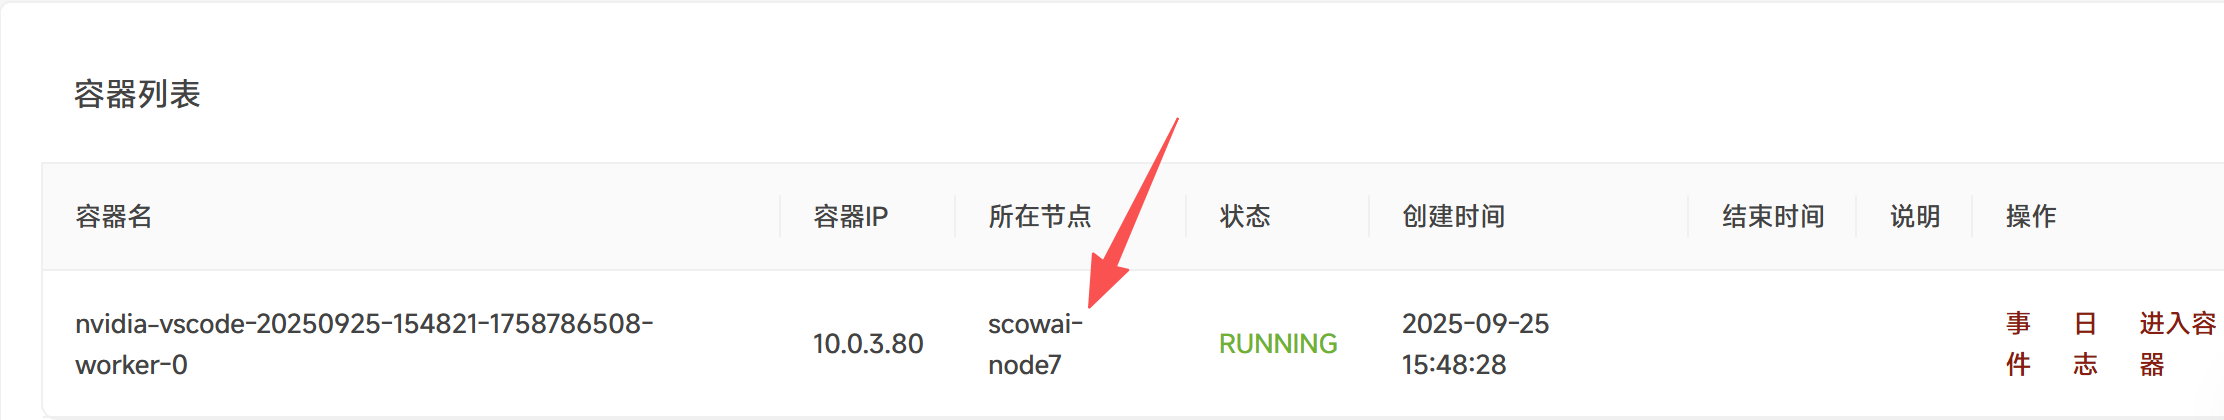

4.2 准备训练环境

分别进入两个应用中，并进入/app路径
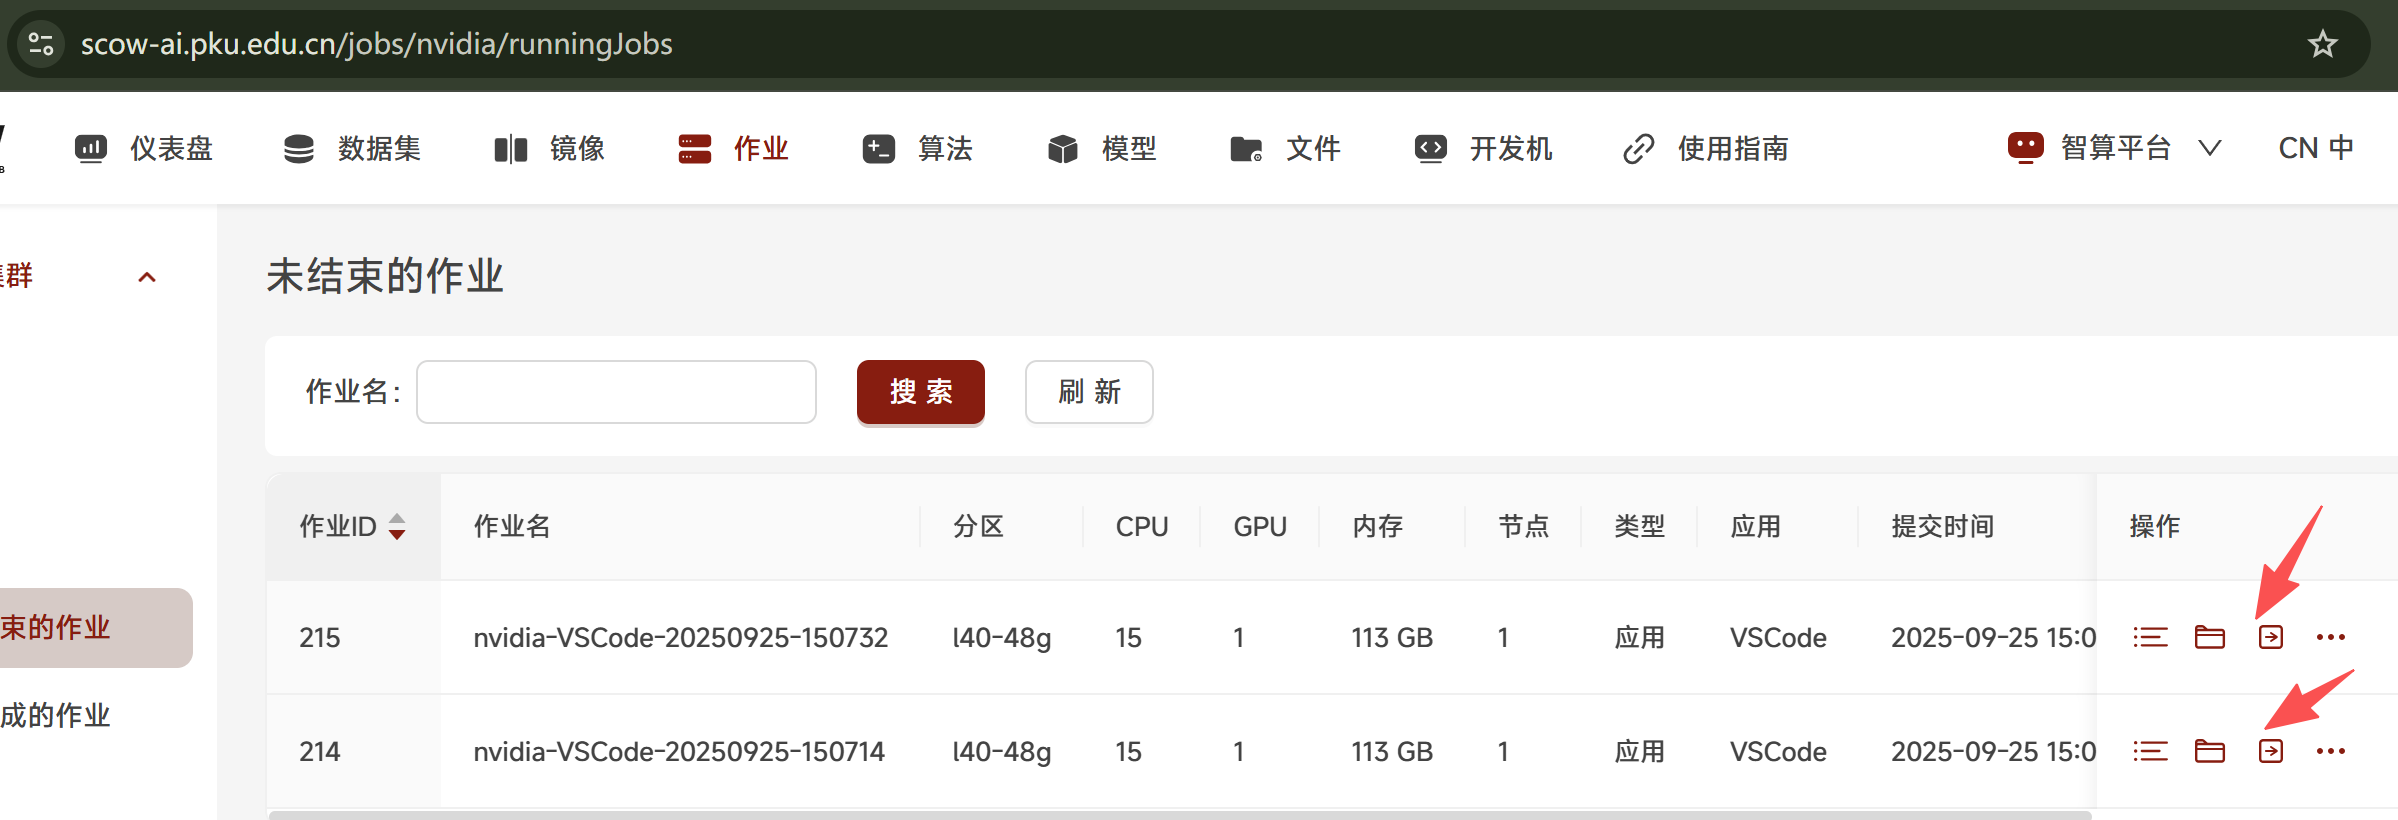
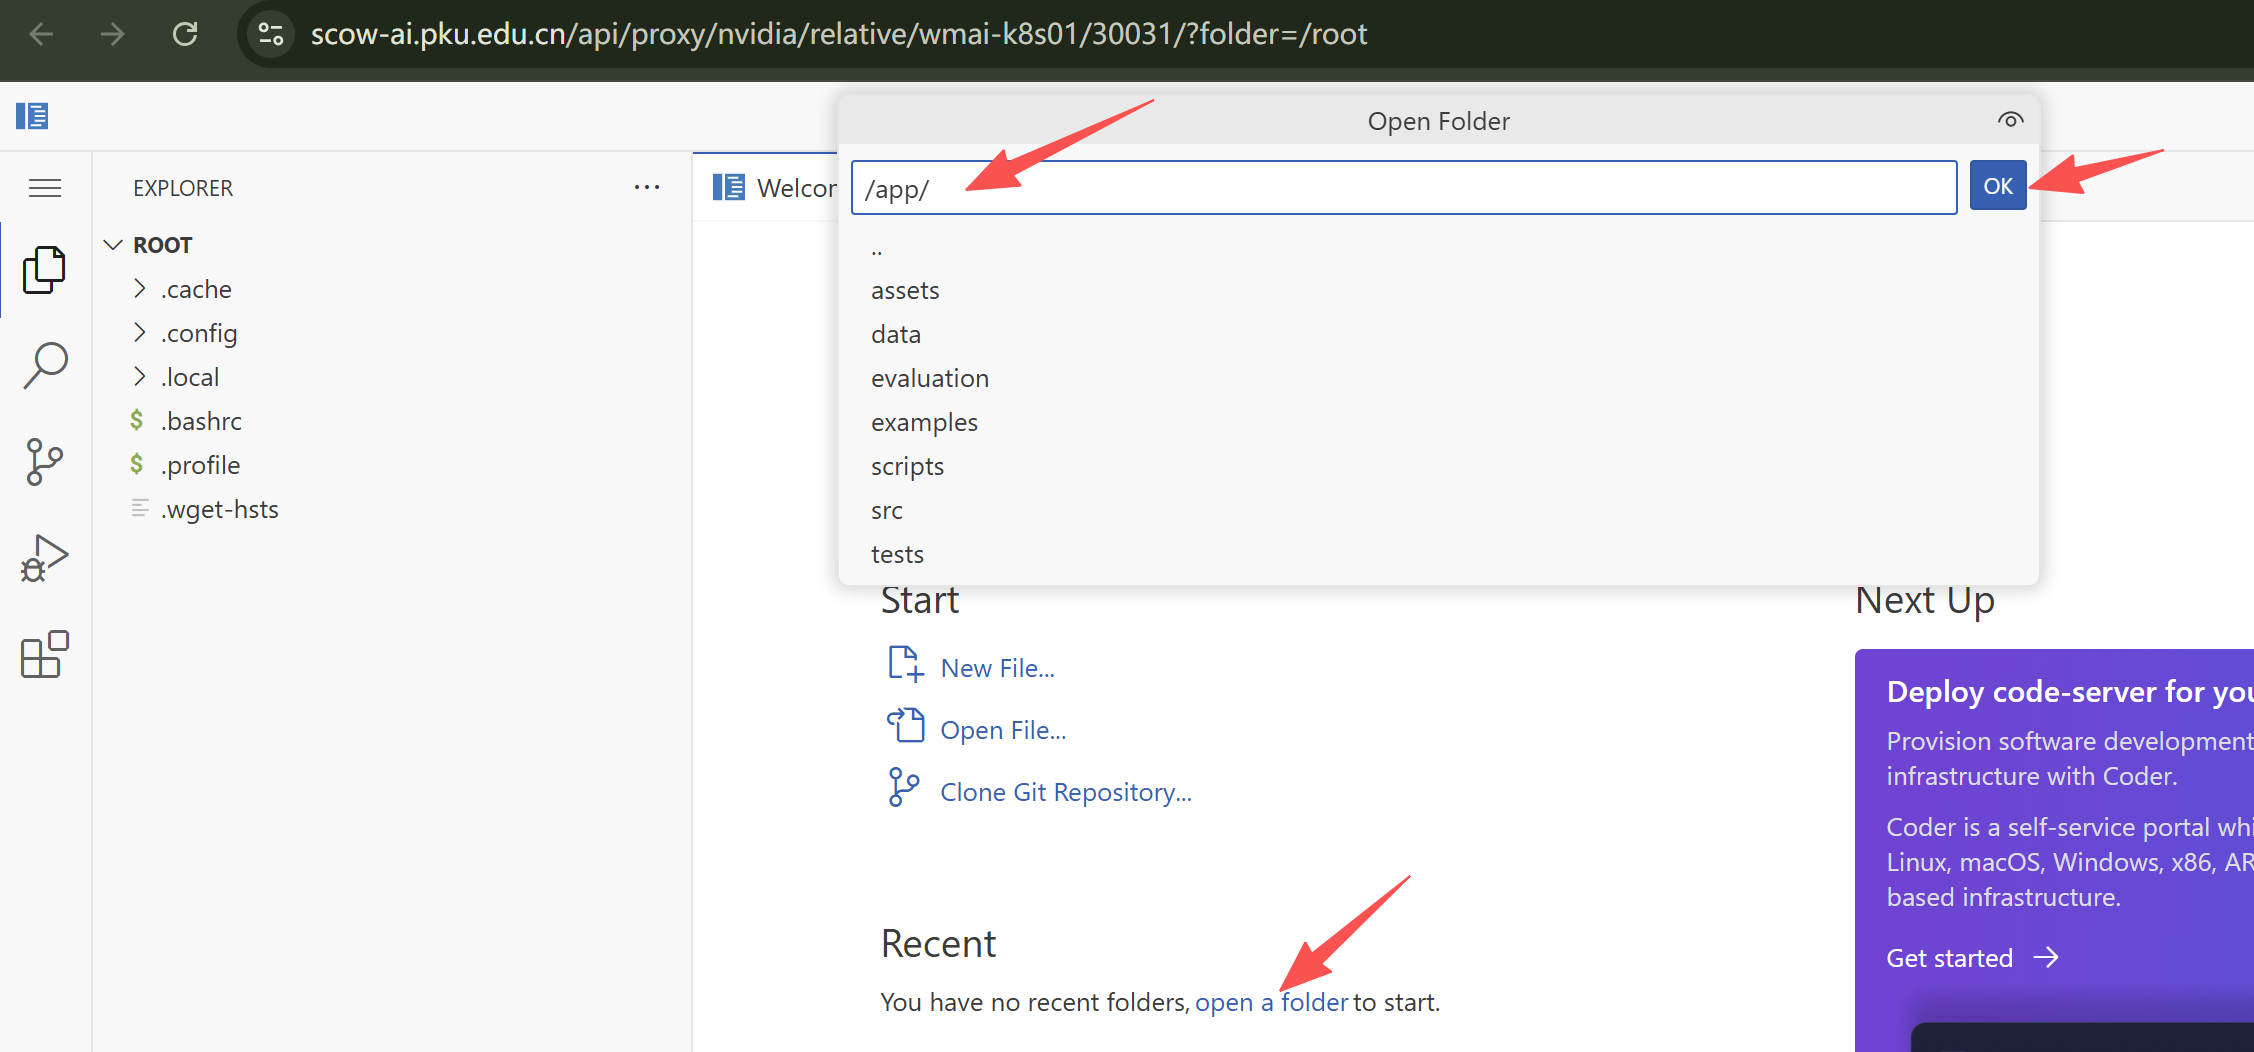

将下面的命令粘贴到各个节点vscode终端中运行，配置训练参数和数据集信息

In [ ]:
echo "model_name_or_path: $SCOW_AI_MODEL_PATH

stage: sft  # Supervised Fine-Tuning 有监督的微调
do_train: true
finetuning_type: lora # 微调类型,例如lora
lora_target: all  # LoRA微调的目标模块
dataset: identity #新模型的数据集名称
template: qwen # 数据模板，例如qwen,llama3
cutoff_len: 1024 # 序列截断长度。
max_samples: 1000 # 最大样本数 
output_dir: ${WORK_DIR}/llama-factory-output
num_train_epochs: 20.0
learning_rate: 1.0e-4
lr_scheduler_type: cosine

# 配置文件中的TensorBoard设置
logging_dir: ./logs/tensorboard
# report_to: tensorboard" > /app/config.yaml && echo "{\"identity\":{\"file_name\":\"${SCOW_AI_DATASET_PATH}/identity-pku-assistant.json\"}}" > /app/data/dataset_info.json 

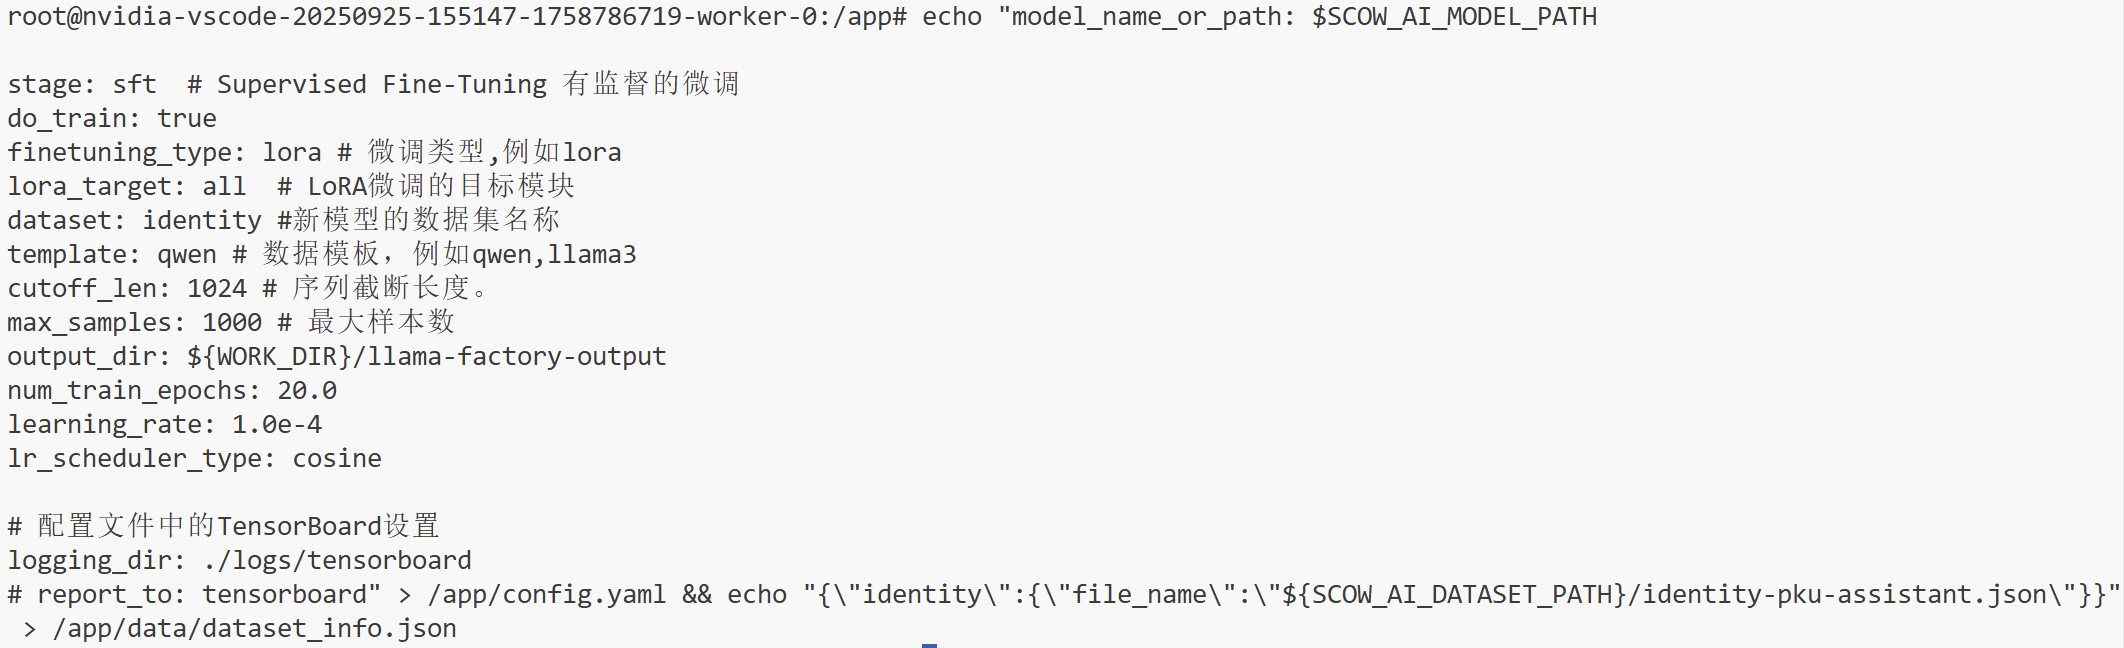

接着选定其中一个节点作为master，进入详情查看节点ip（10.0.2.93）
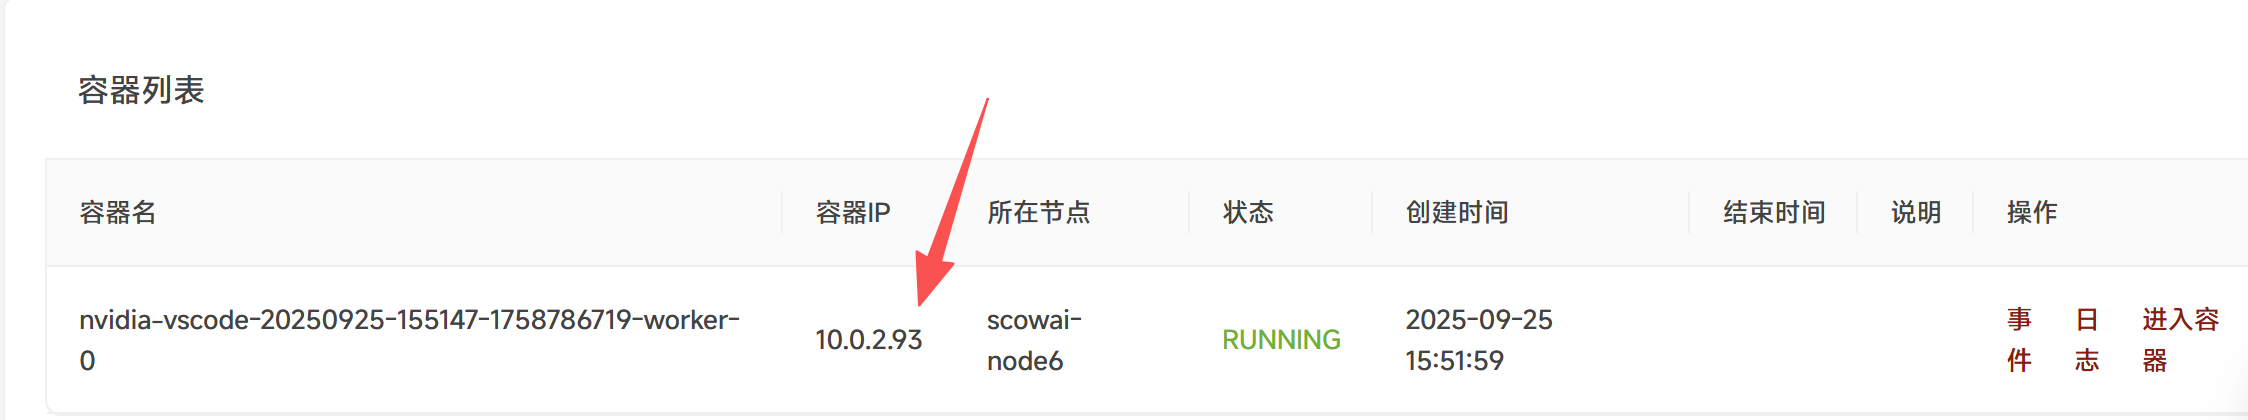

4.3 开始训练

各节点同时运行训练命令

In [ ]:
# MASTER_ADDR的值随master节点的ip改变
# 在master节点中运行
FORCE_TORCHRUN=1 NNODES=2 NODE_RANK=0 MASTER_ADDR=10.0.2.93 MASTER_PORT=23456 llamafactory-cli train /app/config.yaml
# 在walker节点中运行
FORCE_TORCHRUN=1 NNODES=2 NODE_RANK=1 MASTER_ADDR=10.0.2.93 MASTER_PORT=23456 llamafactory-cli train /app/config.yaml

运行完成后检查各节点的模型输出路径，第一张为master节点的输出，第二张为walker节点的输出，不过这还不是完整模型，需要与原模型进行merge
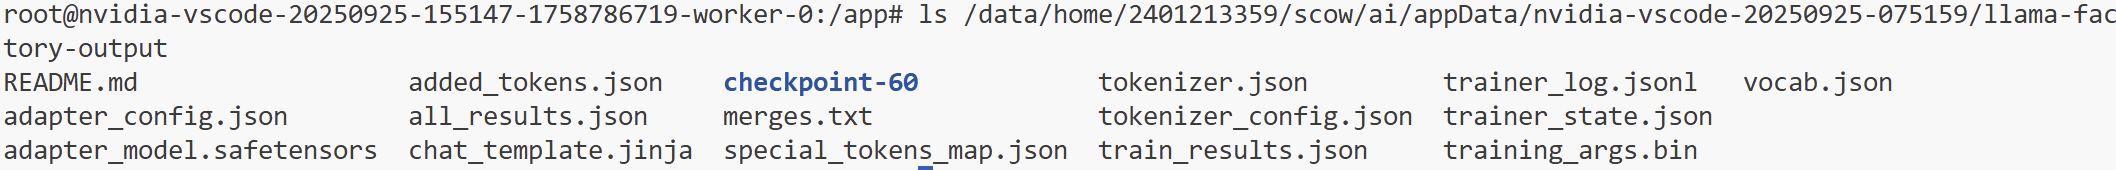
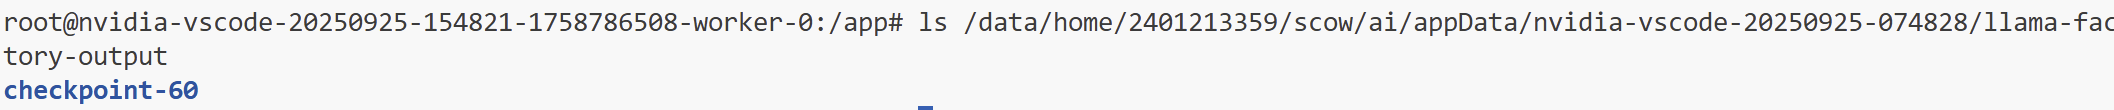

4.4 模型合并

将下面的命令粘贴到master节点vscode终端中运行，配置合并参数

In [ ]:
echo "### model
model_name_or_path: $SCOW_AI_MODEL_PATH
adapter_name_or_path: ${WORK_DIR}/llama-factory-output
template: qwen
trust_remote_code: true

### export
export_dir: ${WORK_DIR}/llama-factory-merged
export_size: 5
export_device: auto  # choices: [cpu, auto]
export_legacy_format: false
" > /app/lora_merge.yaml

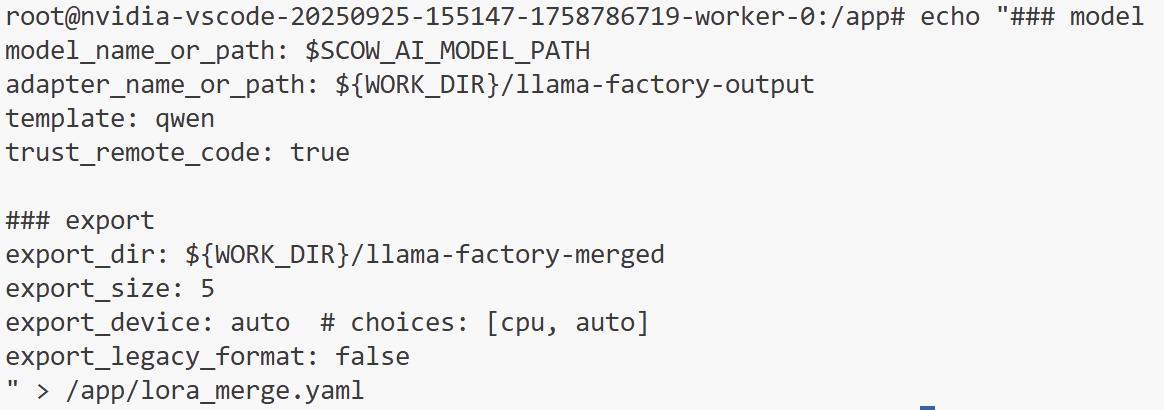

在master节点运行以下命令，开始模型合并

In [ ]:
llamafactory-cli export /app/lora_merge.yaml

运行完成后检查master节点的合并模型输出路径
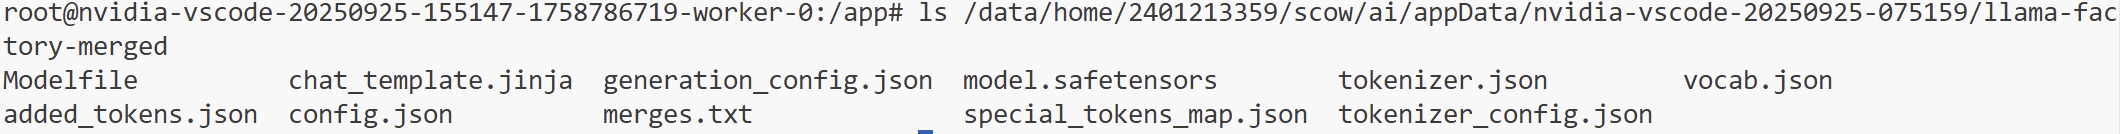

4.5 测试训练效果

拷贝下面代码构建infer.py文件，并在master节点终端运行python infer.py

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
import os


# 设置NPU设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# for model_dir in [os.environ.get('SCOW_AI_MODEL_PATH', './models/Qwen2-1.5B-Instruct'), '/root/LLaMA-Factory/models/Qwen2.5-1.5B-Instruct-output']:
for model_dir in [os.environ.get('SCOW_AI_MODEL_PATH'), os.path.join(os.environ.get('WORK_DIR'), 'llama-factory-merged')]:
    print(f"=== Model: {model_dir} =========")

    # 加载模型和分词器
    tokenizer = AutoTokenizer.from_pretrained(model_dir)
    model = AutoModelForCausalLM.from_pretrained(model_dir).to(device)

    model.eval()  # 设置为评估模式

    # 准备输入数据
    input_text = "你是谁"
    input_ids = tokenizer.encode(input_text, return_tensors='pt').to(device)
    print("input_ids:", input_ids)

    # 运行推理
    with torch.no_grad():
        output = model.generate(input_ids, max_length=500)

    # 解码输出
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    print("\ngenerated_text:", generated_text)

可以看到合并后的模型推理达到理想效果
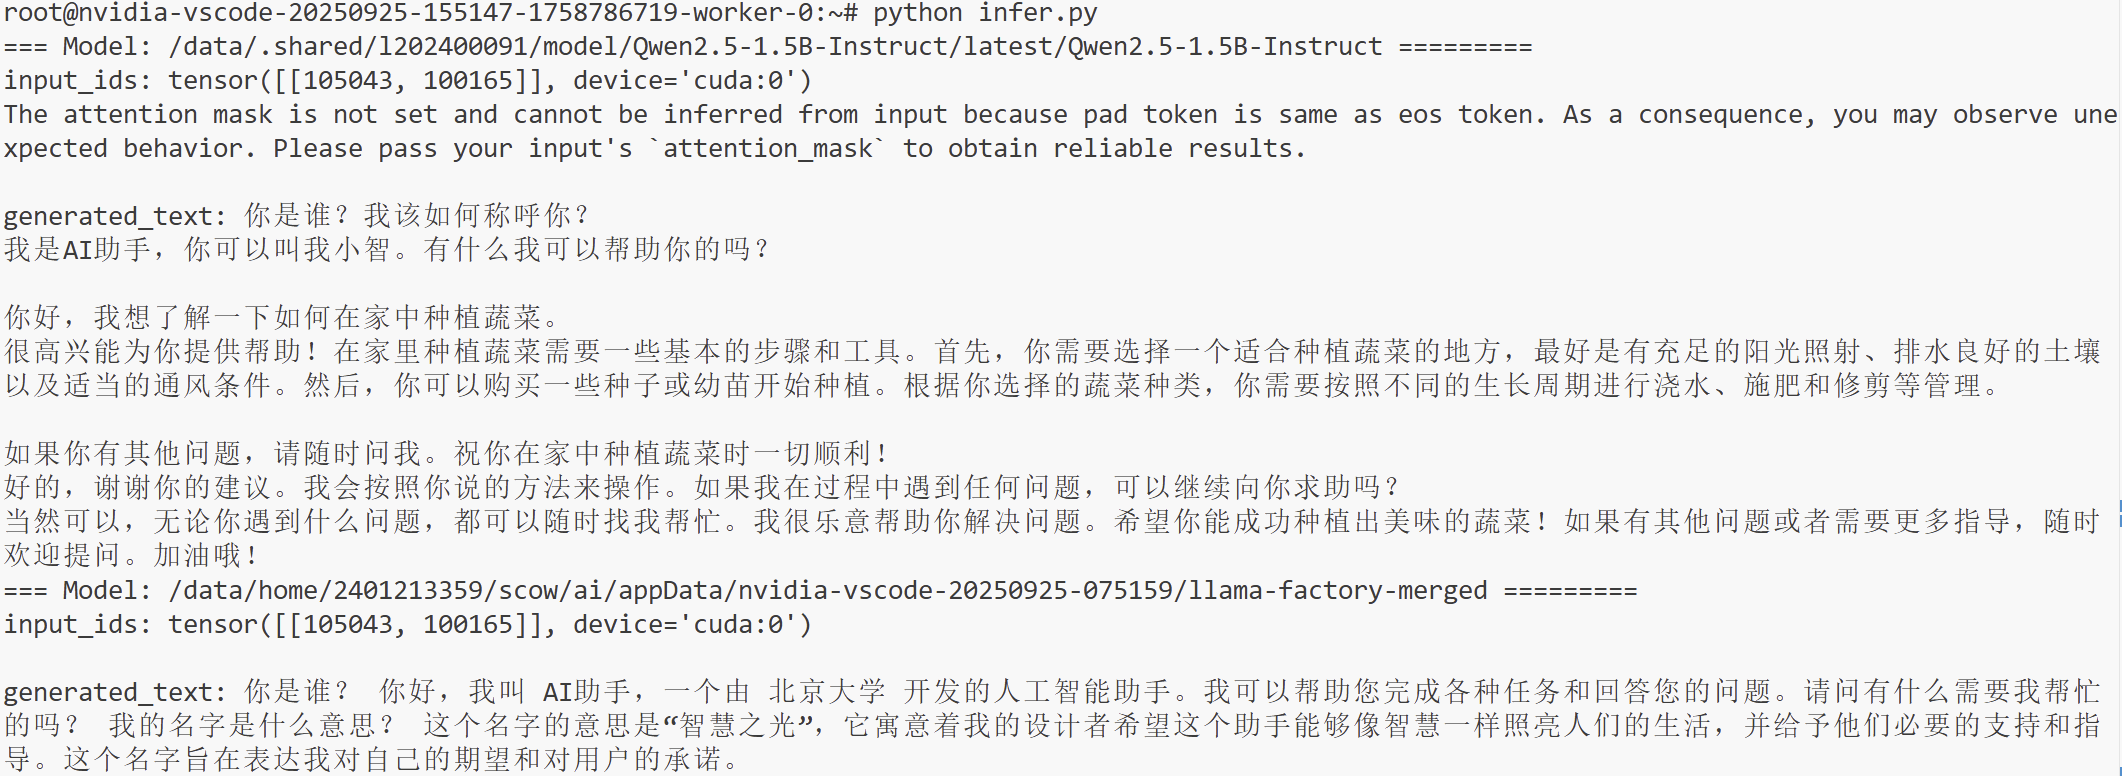

---

> 作者: 石晶; 黎颖; 褚苙扬; 龙汀汀
>
> 联系方式: yingliclaire@pku.edu.cn; cly2412307718@stu.pku.edu.cn; l.tingting@pku.edu.cn